In [ ]:
import sys
sys.path.append('/Volumes/1TB/Users/peterbernstein/Django/SpineSplinr')

In [1]:
from fastai.vision import *
#from nb_helpers import *
from nb_heatmap import *
import torchvision.transforms as T
import numpy as np
import pandas as pd
import random
import scipy.interpolate as ip
from scipy.signal import argrelextrema
from PIL import ImageFont,ImageDraw,ImageColor
from vertebra_detector import CobbAngleDetector


defaults.device = torch.device('cpu')

In [2]:
modelpath='/Volumes/1TB/Users/peterbernstein/eclipse-workspace/scoliosis_deep_production_v3/vertebrae_detection_model.pkl'
net_folder = Path(modelpath)
learn_model = load_learner(net_folder.parent, net_folder.name)


### Random Xray

{'UpperVertebra': 'T1', 'LowerVertebra': 'L5', 'EndVertebrae': [('T2', 'T12'), ('T12', 'L4')], 'EndVertebraeIndices': [(1, 11), (11, 15)], 'COBBAngles': [10, 16], 'VertebraeCentroids': array([[258, 117],
       [259, 130],
       [261, 144],
       [261, 158],
       [260, 172],
       [259, 188],
       [257, 204],
       [256, 220],
       [254, 236],
       [253, 254],
       [253, 274],
       [255, 295],
       [256, 317],
       [254, 340],
       [250, 363],
       [246, 387],
       [240, 409]]), 'Spline': [(258, 117), (257, 118), (257, 119), (257, 120), (258, 121), (258, 122), (258, 123), (258, 124), (258, 125), (258, 126), (258, 127), (258, 128), (258, 129), (259, 130), (259, 131), (259, 132), (259, 133), (259, 134), (259, 135), (259, 136), (260, 137), (260, 138), (260, 139), (260, 140), (260, 141), (260, 142), (260, 143), (261, 144), (261, 145), (261, 146), (261, 147), (261, 148), (261, 149), (261, 150), (261, 151), (261, 152), (261, 153), (261, 154), (261, 155), (261, 156),

{'UpperVertebra': 'T3', 'LowerVertebra': 'L4', 'EndVertebrae': [('T12', 'L3')], 'EndVertebraeIndices': [(9, 12)], 'COBBAngles': [10], 'VertebraeCentroids': array([[243,  24],
       [246,  49],
       [245,  99],
       [244, 125],
       [243, 153],
       [243, 182],
       [242, 211],
       [241, 241],
       [241, 276],
       [244, 313],
       [245, 352],
       [241, 393],
       [236, 437],
       [229, 480]]), 'Spline': [(243, 24), (243, 25), (243, 26), (243, 27), (243, 28), (243, 29), (244, 30), (244, 31), (244, 32), (244, 33), (244, 34), (244, 35), (244, 36), (245, 37), (245, 38), (245, 39), (245, 40), (245, 41), (245, 42), (245, 43), (245, 44), (245, 45), (245, 46), (245, 47), (245, 48), (246, 49), (246, 50), (246, 51), (246, 52), (246, 53), (246, 54), (246, 55), (246, 56), (246, 57), (246, 58), (246, 59), (246, 60), (246, 61), (246, 62), (246, 63), (246, 64), (246, 65), (246, 66), (246, 67), (246, 68), (246, 69), (246, 70), (246, 71), (246, 72), (246, 73), (246, 74), (246

{'UpperVertebra': 'T1', 'LowerVertebra': 'L5', 'EndVertebrae': [('T5', 'T11'), ('T11', 'L4')], 'EndVertebraeIndices': [(4, 10), (10, 15)], 'COBBAngles': [12, 24], 'VertebraeCentroids': array([[264, 118],
       [264, 133],
       [264, 149],
       [264, 165],
       [262, 182],
       [260, 199],
       [259, 217],
       [259, 236],
       [259, 256],
       [259, 278],
       [261, 300],
       [264, 324],
       [266, 350],
       [263, 375],
       [256, 402],
       [246, 430],
       [238, 456]]), 'Spline': [(264, 118), (264, 119), (264, 120), (264, 121), (264, 122), (264, 123), (264, 124), (264, 125), (264, 126), (264, 127), (264, 128), (264, 129), (264, 130), (264, 131), (264, 132), (264, 133), (263, 134), (263, 135), (263, 136), (263, 137), (263, 138), (263, 139), (263, 140), (263, 141), (263, 142), (263, 143), (263, 144), (263, 145), (263, 146), (263, 147), (263, 148), (264, 149), (264, 150), (264, 151), (264, 152), (264, 153), (264, 154), (264, 155), (264, 156), (264, 157),

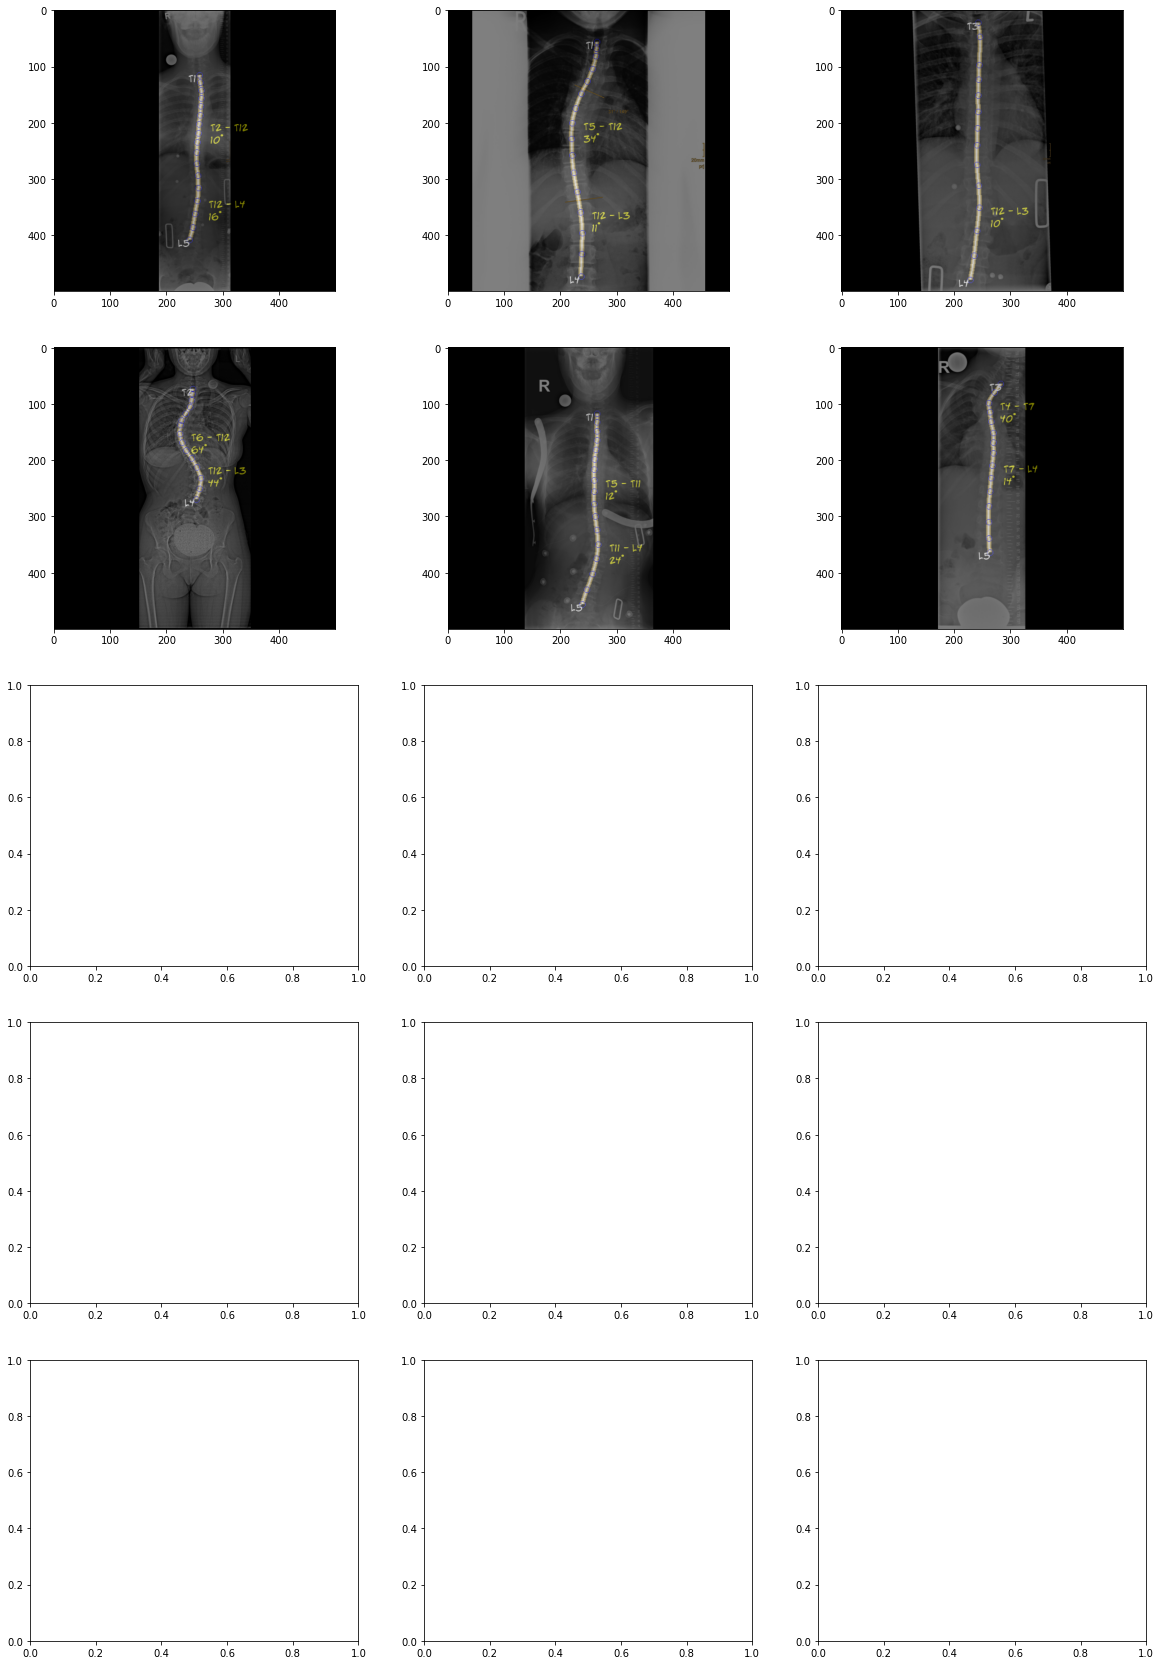

In [5]:
#imgdir='/Volumes/1TB/Users/peterbernstein/eclipse-workspace/Test1/ordbilder/xray_resized'
imgdir='/Volumes/1TB/Users/peterbernstein/Django/SpineSplinr/splineapp/dl_detektor/tests/data2'
fNames = list(filter(lambda x: x.lower().endswith(('.png', '.jpg', '.jpeg')), os.listdir(imgdir)))
n=6
ax = np.ravel(plt.subplots(nrows=5,ncols=3,figsize=(20,30))[1])
for i in range(n):
    path2img = imgdir+'/'+rlist[i]
    img_pil = PIL.Image.open(path2img)
    cad=CobbAngleDetector(learn_model)
    cad.fit(img_pil)
    cad.generateCOBB()
    cad.generateAnnotatedImage()
    print(cad.cobbdata)
    ax[i].imshow(cad.annotated_image)